The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
+---+-----+-----+-----+-----+-----+-----+
| A | aaa | bbb | ccc | ddd | eee | fff |
| B | aaa | bbb | eex | -   | -   | fff |
+---+-----+-----+-----+-----+-----+-----+


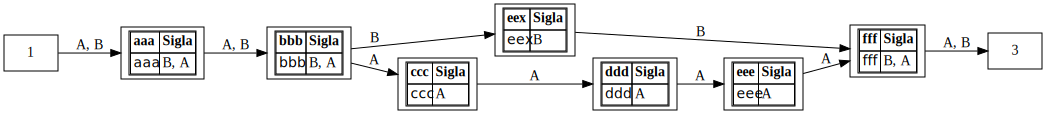

In [73]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '/Users/djb/collatex/collatex-pythonport')  # CollateX from repo if not installed
from collatex import *
collation = Collation()
collation.add_plain_witness("A", "aaa bbb ccc ddd eee fff")
collation.add_plain_witness("B", "aaa bbb eex fff")
# collation.add_plain_witness("C", "aaa bbb eex ddd fff")
# collation.add_plain_witness("D", "aaa aaa aaa aaa aaa")
table = collate(collation, segmentation=False, near_match=False)
print(table)
collate(collation, segmentation=False, output="svg", near_match=False)

In [138]:
import networkx as nx
# import matplotlib.pyplot as plt
from networkx.algorithms.dag import topological_sort
# from IPython.core.display import display

g = nx.DiGraph()
g.add_node('start')
g.add_node('end')
"""\
A: The big gray  fuzzy koala
B: The     grey        koala
   AB1 A1  A2/B1 A3    AB2
"""

# Copied from core_classes.py
class VariantGraphRanking(object):
    # Do not class the constructor, use the of class method instead!
    def __init__(self):
        # Note: A vertex can have only one rank
        # however, a rank can be assigned to multiple vertices
        self.byVertex = {}
        self.byRank = {}

    def apply(self, vertex):
        return self.byVertex[vertex]

    @classmethod
    def of(cls, graph):
        variant_graph_ranking = VariantGraphRanking()
        topological_sorted_vertices = topological_sort(graph)
        for v in topological_sorted_vertices:
            in_ranks = []
            print('Processing vertex: ' + v)
            for (source, target, data) in graph.in_edges(v, data=True):
                print('source for ' + v + ' is node ' + source + \
                      ' with attributes ' + str(g.node[source]))
                print('target for ' + v + ' is node ' + target + \
                      ' with attributes ' + str(g.node[target]))
                print('edge attributes for (' + source +', ' + target + ') are ' + str(data))
                in_ranks.append(variant_graph_ranking.byVertex[source])
            print('possible in_ranks of source ' + v + ' are ' + str(in_ranks))
            rank = max(in_ranks) + 1 if in_ranks else 0
            print('rank of target is ' + str(rank) + '\n')
            variant_graph_ranking.byVertex[v] = rank
            variant_graph_ranking.byRank.setdefault(rank, []).append(v)
        return variant_graph_ranking

g.add_node('AB1',witness=['A','B'],value='The')
g.add_node('A1',witness=['A'],value='big')
g.add_node('A2',witness=['A'],value='gray')
g.add_node('A3',witness=['A'],value='fuzzy')
g.add_node('B1',witness='B',value='grey')
g.add_node('AB2',witness=['A','B'],value='koala')
g.add_edges_from([('start','AB1'),('AB1','A1'),('A1', 'A2'),('A2','A3'),('A3','AB2'),('AB2','end')])
g.add_edges_from([('AB1','B1'),('B1','AB2')])
# g.add_edge('A2','B1', type='near', animal='koala') # typed edge for closest edit distance
ranking = VariantGraphRanking.of(g)

Processing vertex: start
possible in_ranks of source start are []
rank of target is 0

Processing vertex: AB1
source for AB1 is node start with attributes {}
target for AB1 is node AB1 with attributes {'witness': ['A', 'B'], 'value': 'The'}
edge attributes for (start, AB1) are {}
possible in_ranks of source AB1 are [0]
rank of target is 1

Processing vertex: B1
source for B1 is node AB1 with attributes {'witness': ['A', 'B'], 'value': 'The'}
target for B1 is node B1 with attributes {'witness': 'B', 'value': 'grey'}
edge attributes for (AB1, B1) are {}
possible in_ranks of source B1 are [1]
rank of target is 2

Processing vertex: A1
source for A1 is node AB1 with attributes {'witness': ['A', 'B'], 'value': 'The'}
target for A1 is node A1 with attributes {'witness': ['A'], 'value': 'big'}
edge attributes for (AB1, A1) are {}
possible in_ranks of source A1 are [1]
rank of target is 2

Processing vertex: A2
source for A2 is node A1 with attributes {'witness': ['A'], 'value': 'big'}
target 